<a href="https://colab.research.google.com/github/DrPasidth/Thailand-IOT-4.0/blob/master/VGG16BlackpinkByKai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.3 MB/s eta 0:00:00


In [2]:
import mtcnn

In [11]:
from mtcnn.mtcnn import MTCNN

**แตกไฟล์ dataset**

In [12]:
!unzip -q -o /content/blackpinkfaces.zip

In [13]:
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,Input
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

from imutils import paths
import cv2
import numpy as np
import os

In [14]:
imagePaths = list(paths.list_images("/content/blackpinkfaces"))
data = []
labels = []

for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	if label == "jennie":
		label = 0
	elif label == "jisoo" :
		label = 1
	elif label == "lisa":
		label = 2
	elif label == "rose":
		label = 3
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (64, 64))
	image = image/255.0
	data.append(image)
	labels.append(label)




In [15]:
data = np.array(data)
labels = np.array(labels)

In [16]:
print(data[0])

[[[0.35686275 0.30196078 0.25882353]
  [0.48627451 0.40392157 0.35294118]
  [0.54509804 0.44313725 0.38823529]
  ...
  [0.23137255 0.17254902 0.14509804]
  [0.23921569 0.16470588 0.14117647]
  [0.24313725 0.16862745 0.14509804]]

 [[0.38039216 0.32156863 0.27843137]
  [0.50196078 0.41176471 0.36470588]
  [0.54117647 0.43529412 0.38431373]
  ...
  [0.23529412 0.17647059 0.14901961]
  [0.23137255 0.16078431 0.1372549 ]
  [0.23529412 0.16862745 0.14117647]]

 [[0.44313725 0.36470588 0.32941176]
  [0.49019608 0.37647059 0.35294118]
  [0.50196078 0.38039216 0.36078431]
  ...
  [0.26666667 0.21568627 0.18431373]
  [0.21960784 0.16862745 0.1372549 ]
  [0.21960784 0.18823529 0.14509804]]

 ...

 [[0.17647059 0.14901961 0.11764706]
  [0.17647059 0.14901961 0.11764706]
  [0.17647059 0.14901961 0.11764706]
  ...
  [0.12941176 0.13333333 0.10980392]
  [0.13333333 0.1372549  0.11372549]
  [0.14117647 0.1372549  0.11764706]]

 [[0.17647059 0.14901961 0.11764706]
  [0.17647059 0.14901961 0.11764706]


In [17]:
print(labels[0])

0


In [18]:
x_train = data
y_train = labels

In [19]:
print(x_train.shape)

(40, 64, 64, 3)


In [20]:
print(y_train.shape)

(40,)


In [21]:
base_model = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(64, 64, 3)))

58889256/58889256 [==============================] - 4s 0us/step


In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [23]:
base_model.trainable = False

In [25]:
model = Sequential()

In [26]:
model.add(base_model)

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(256, activation='relu'))

In [29]:
model.add(Dense(128, activation='relu'))

In [30]:
model.add(Dropout(0.2))

In [31]:
model.add(Dense(64, activation='relu'))

In [32]:
model.add(Dropout(0.2))

In [33]:
model.add(Dense(4,activation='softmax'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [35]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [36]:
model.fit(x_train, y_train,epochs=10)

Epoch 1/10
2/2 [==============================] - 7s 763ms/step - loss: 1.5780 - accuracy: 0.2000
Epoch 2/10
2/2 [==============================] - 0s 15ms/step - loss: 1.2024 - accuracy: 0.4500
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 1.2250 - accuracy: 0.4500
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 0.9960 - accuracy: 0.6500
Epoch 5/10
2/2 [==============================] - 0s 13ms/step - loss: 0.9925 - accuracy: 0.5500
Epoch 6/10
2/2 [==============================] - 0s 13ms/step - loss: 0.8138 - accuracy: 0.6250
Epoch 7/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6843 - accuracy: 0.7500
Epoch 8/10
2/2 [==============================] - 0s 13ms/step - loss: 0.6832 - accuracy: 0.7250
Epoch 9/10
2/2 [==============================] - 0s 13ms/step - loss: 0.4915 - accuracy: 0.8250
Epoch 10/10
2/2 [==============================] - 0s 13ms/step - loss: 0.4977 - accuracy: 0.8500


In [37]:
model.save("blackpinkmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model = load_model("blackpinkmodel.h5")

In [39]:
detector = MTCNN()

In [40]:
def face_detect(img):
  image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  faces = detector.detect_faces(image)
  for face in faces:
    x,y,w,h = face['box']
    face = img[y:y+h,x:x+w]
    face_resized = cv2.resize(face,(64,64),interpolation=cv2.INTER_LINEAR)
    data = [face_resized]
    data = np.array(data)
    data = data/255.0

    predId = model.predict(data)
    result = np.argmax(predId)

    print(predId)
    print(result)
    if result == 0:
      print("Jennie")
      text = "Jennie"
    if result == 1:
      print("Jisoo")
      text = "Jisoo"
    if result == 2:
      print("Lisa")
      text = "Lisa"
    if result == 3:
      print("Rose")
      text = "Rose"
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(img,text,(x,y-4),cv2.FONT_HERSHEY_SIMPLEX,0.4,(0,0,255),1)
  return img


In [42]:
image = cv2.imread("blackpinkall.jpg")

In [43]:
image = face_detect(image)

1/1 [==============================] - 1s 642ms/step
[[0.91374713 0.04293423 0.01573429 0.02758442]]
0
Jennie
1/1 [==============================] - 0s 19ms/step
[[0.84155023 0.09077892 0.01444895 0.05322196]]
0
Jennie
1/1 [==============================] - 0s 19ms/step
[[0.02452874 0.01709633 0.87354255 0.08483237]]
2
Lisa
1/1 [==============================] - 0s 22ms/step
[[0.17640579 0.08498625 0.17781761 0.5607904 ]]
3
Rose


In [44]:
from google.colab.patches import cv2_imshow

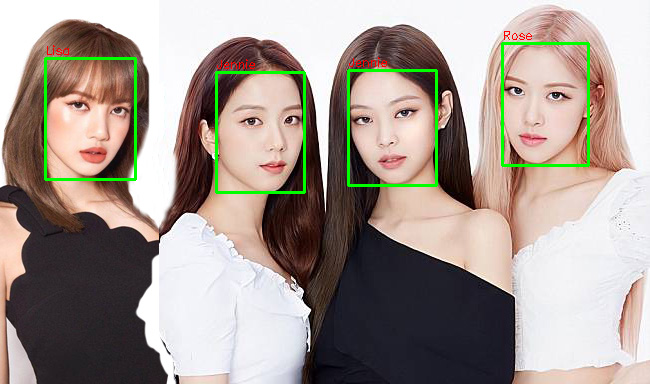

In [45]:
cv2_imshow(image)

In [51]:
image = cv2.imread("/content/blackpink.jpg")

In [52]:
image = face_detect(image)

1/1 [==============================] - 0s 19ms/step
[[0.06641705 0.0483073  0.7439048  0.14137079]]
2
Lisa
1/1 [==============================] - 0s 18ms/step
[[0.15009001 0.1868325  0.30353358 0.3595439 ]]
3
Rose
1/1 [==============================] - 0s 18ms/step
[[0.42879388 0.16107364 0.19722772 0.2129047 ]]
0
Jennie
1/1 [==============================] - 0s 20ms/step
[[0.15831612 0.05622201 0.5214307  0.26403123]]
2
Lisa


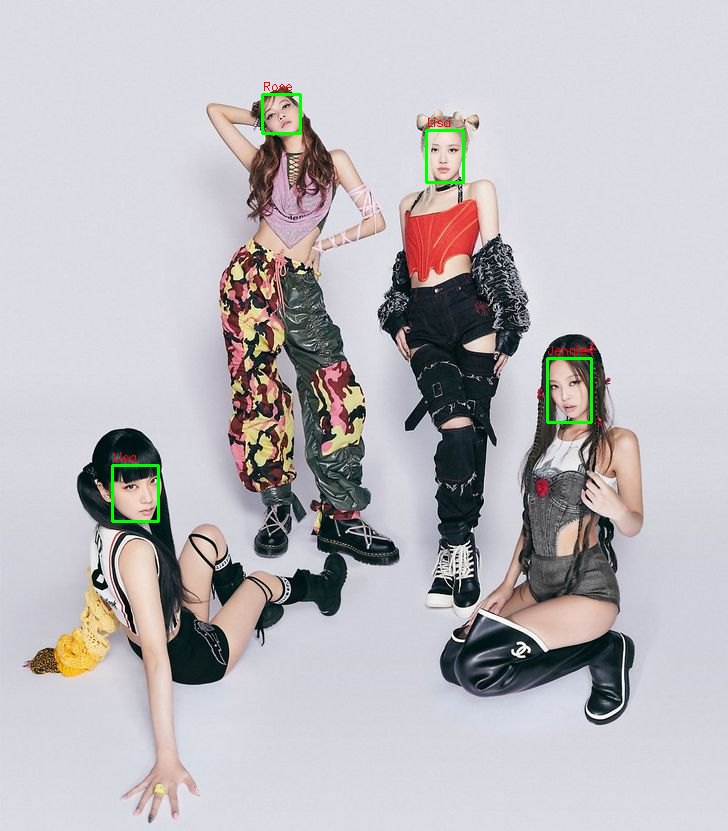

In [53]:
cv2_imshow(image)